In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

# Multinomial Naive Bayes on Headlines Only

In [3]:
df = pd.read_csv('features.csv', sep='|', index_col=0)
df['Company'].value_counts()

Facebook          1977
Twitter            902
Alibaba            544
Groupon            426
General Motors     368
LinkedIn           193
Snapchat           185
Blue Apron         125
Fitbit             114
Etsy               104
Shake Shack        103
GoPro               91
Workday             90
Ferrari             46
Stitch Fix          33
Name: Company, dtype: int64

In [4]:
df.shape

(5301, 36)

## Tried Removing Facebook Since it Represented a Disproportionate Number of Instances

In [5]:
#df_woFB = df[df['Company'] != 'Facebook']
#df_woFB['Company'].value_counts()

In [6]:
## Replacing all the numbers in the text to 'NUM_' to simplify and reduce total featues
text_data = df['Headline'].replace('\d+', 'NUM_', regex=True)
#text_data = df['Headline']
#text_data = df_woFB['Headline'].replace('\d+', 'NUM_', regex=True)
text_data.shape

(5301,)

In [7]:
my_stop_words = ('facebook', 'linkedin', 'groupon', 'snap', 'twitter', 'alibaba', 'group', 'holding', 'etsy', 'fitbit',
                'workday', 'gopro', 'blue', 'apron', 'holdings', 'ferrari', 'general', 'motors', 'shake', 'shack',
                'stitch', 'fix', 'tesla', 'motors', 'num_', 'ipo', 'negative', 'neutral', 'positive')
stop_words = text.ENGLISH_STOP_WORDS.union(my_stop_words)

In [8]:
vectorizer = CountVectorizer(analyzer='word', stop_words=stop_words)

In [9]:
vectorizer.fit(text_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset({'my', 'whenever', 'enough', 'if', 'something', 'yours', 'own', 'here', 'neither', 'eg', 'ferrari', 'may', 'bottom', 'via', 'of', 'rather', 'out', 'cant', 'eleven', 'go', 'what', 'none', 'without', 'couldnt', 'groupon', 'some', 'onto', 'whereas', 'about', 'seeming', 'three', 'no...nwhile', 'seem', 'could', 'get', 'against', 'before', 'seems', 'whose', 'me', 'from', 'no', 'then'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [10]:
vectorizer.get_feature_names()
#vectorizer.vocabulary_

['abandons',
 'abercrombie',
 'ability',
 'able',
 'abound',
 'abounding',
 'accel',
 'accelerate',
 'acceleration',
 'access',
 'accessibility',
 'accommodations',
 'according',
 'account',
 'accounting',
 'accounts',
 'accusations',
 'accused',
 'achievements',
 'achilles',
 'ackaman',
 'acquired',
 'acquisition',
 'acquisitions',
 'acsoi',
 'act',
 'action',
 'actions',
 'active',
 'activity',
 'ad',
 'adapt',
 'add',
 'added',
 'adding',
 'additional',
 'address',
 'addressed',
 'addressing',
 'adds',
 'admits',
 'adp',
 'adrs',
 'ads',
 'advance',
 'adventure',
 'advertis',
 'advertisers',
 'advertisi',
 'advertising',
 'advice',
 'advise',
 'adviser',
 'advisers',
 'advisory',
 'advocates',
 'affair',
 'affect',
 'affected',
 'affects',
 'affordable',
 'aflutter',
 'afraid',
 'aftermath',
 'aftershocks',
 'age',
 'agency',
 'agenda',
 'agent',
 'aggregate',
 'aggressive',
 'ago',
 'agreements',
 'agrees',
 'ah',
 'ahead',
 'ailing',
 'aim',
 'aiming',
 'aims',
 'ain',
 'air',
 'a

In [11]:
pd.DataFrame.from_dict(vectorizer.vocabulary_, orient='index').sort_values(by=0, ascending=False).head()

,0
œtwitter,4682
œquiet,4681
œmarried,4680
œlife,4679
œkick,4678


#### Transform to Document Term Matrix

In [12]:
dtm = vectorizer.transform(text_data)
dtm

<5301x4683 sparse matrix of type '<class 'numpy.int64'>'
	with 28952 stored elements in Compressed Sparse Row format>

In [13]:
Text_Features = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())
Text_Features.shape

(5301, 4683)

In [14]:
#Text_Features.to_csv('TEXT_FEATURES.csv')

In [15]:
Text_Features.shape

(5301, 4683)

In [16]:
features = df[['Word Count', 'IPO Period', 'Day of Week', 'PositiveScore', 'NegativeScore']]
features = pd.merge(Text_Features, features, left_index=True, right_index=True)
features.head()

,abandons,abercrombie,ability,able,abound,abounding,accel,accelerate,acceleration,access,...,œkick,œlife,œmarried,œquiet,œtwitter,Word Count,IPO Period,Day of Week,PositiveScore,NegativeScore
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,358,1,4,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,515,1,5,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,288,2,3,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,583,2,4,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,947,1,6,0.0,0.0


In [17]:
X = features
y = np.array(df['Label'].tolist())
#y = np.array(df_woFB['Label'].tolist())

In [18]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
X_pca = pca.transform(X)
print('Original shape:        ', X.shape)
print('Transformed shape:     ', X_pca.shape)

Original shape:         (5301, 4688)
Transformed shape:      (5301, 2114)


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_pca)
X_pca = scaler.transform(X_pca)

In [22]:
#pca.n_components_
pca.explained_variance_ratio_

array([ 0.00336809,  0.00230696,  0.0020607 , ...,  0.00012122,
        0.00012097,  0.00012078])

In [70]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#X_pca = Text_Features
#y = np.array(df['Label'].tolist())
#len(y)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(3975, 2114) (3975,)


In [71]:
nb = MultinomialNB()

In [72]:
X_pca

array([[ 0.00122797,  0.03115839,  0.01650907, ...,  0.46465157,
         0.4992451 ,  0.52342412],
       [ 0.00151876,  0.03132399,  0.01255741, ...,  0.47080804,
         0.49523861,  0.4924128 ],
       [ 0.00158483,  0.03102054,  0.01232195, ...,  0.48164264,
         0.5230021 ,  0.52626167],
       ..., 
       [ 0.001827  ,  0.03031043,  0.01374816, ...,  0.45585687,
         0.49424897,  0.49247519],
       [ 0.00183808,  0.03113201,  0.01343208, ...,  0.42367749,
         0.49064692,  0.53396802],
       [ 0.00189596,  0.03098353,  0.01489412, ...,  0.47525333,
         0.50108952,  0.51404668]])

In [73]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
y_pred_class = nb.predict(X_test)

In [75]:
#metrics.accuracy_score(y_test, y_pred_class)
metrics.accuracy_score(y_test, y_pred_class)

0.58069381598793368

In [76]:
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

   Negative       0.58      1.00      0.73       770
   Positive       0.00      0.00      0.00       556

avg / total       0.34      0.58      0.43      1326



/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Yellowbrick Classification Report

/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


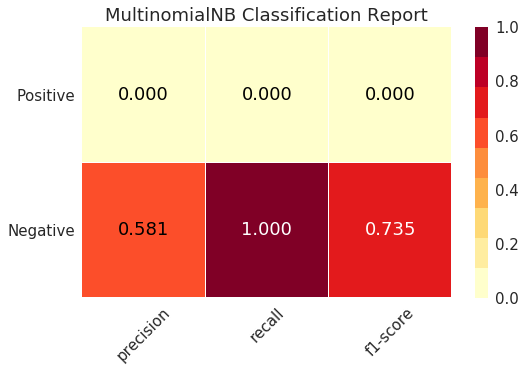

In [77]:
from yellowbrick.classifier import ClassificationReport
bayes = MultinomialNB()
visualizer = ClassificationReport(bayes, classes=['Negative', 'Positive'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

## Confusion Matrix

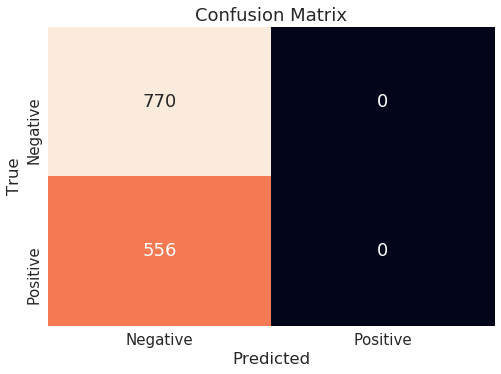

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()

In [79]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1, gamma=1)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
predicted = svc.predict(X_test)

In [80]:
metrics.accuracy_score(y_test, predicted)

0.6809954751131222

In [81]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

   Negative       0.69      0.81      0.75       770
   Positive       0.66      0.50      0.57       556

avg / total       0.68      0.68      0.67      1326



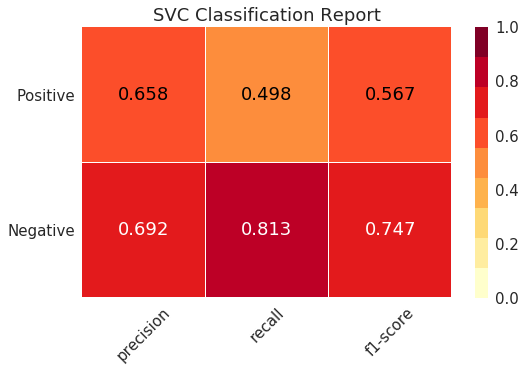

In [82]:
from yellowbrick.classifier import ClassificationReport
svc = SVC(kernel='linear', C=1, gamma=1)
visualizer = ClassificationReport(svc, classes=['Negative', 'Positive'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

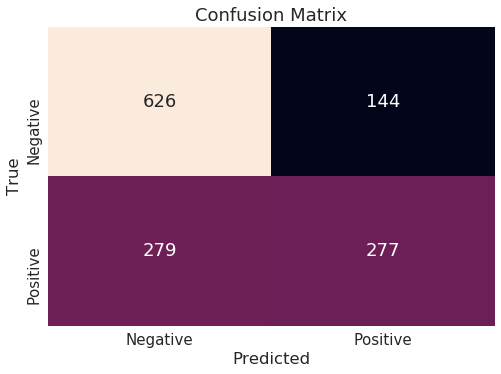

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()

In [84]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
LSVC.fit(X_train, y_train)
LSVC.score(X_test, y_test)
L_predicted = LSVC.predict(X_test)

In [85]:
metrics.accuracy_score(y_test, L_predicted)

0.72247360482654599

In [86]:
print(metrics.classification_report(y_test, L_predicted))

             precision    recall  f1-score   support

   Negative       0.74      0.80      0.77       770
   Positive       0.69      0.62      0.65       556

avg / total       0.72      0.72      0.72      1326



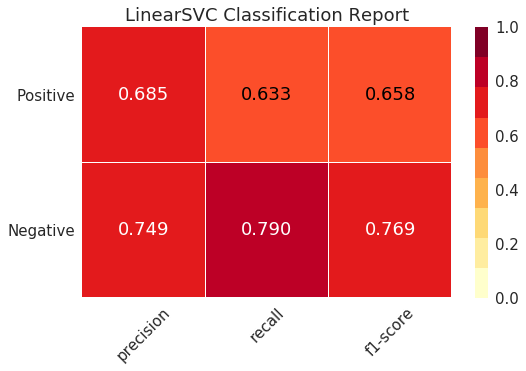

In [87]:
from yellowbrick.classifier import ClassificationReport
LSVC = LinearSVC()
visualizer = ClassificationReport(LSVC, classes=['Negative', 'Positive'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

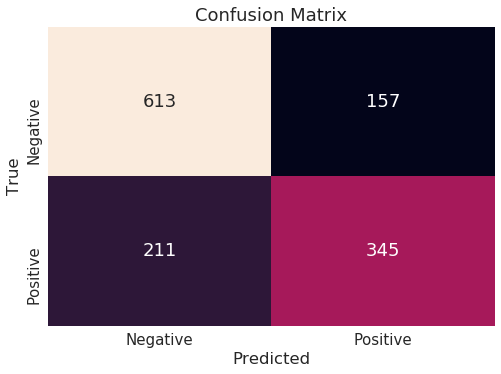

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, L_predicted)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()

## SGD

In [89]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [90]:
sgd.score(X_test, y_test)
y_predicted = sgd.predict(X_test)
metrics.accuracy_score(y_test, y_predicted)

0.41930618401206637

In [91]:
print(metrics.classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00       770
   Positive       0.42      1.00      0.59       556

avg / total       0.18      0.42      0.25      1326



/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


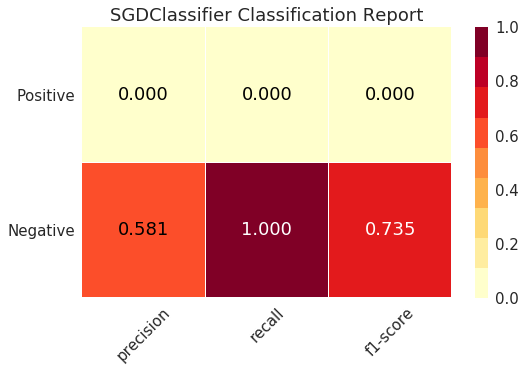

In [92]:
from yellowbrick.classifier import ClassificationReport
sgd = SGDClassifier()
visualizer = ClassificationReport(sgd, classes=['Negative', 'Positive'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

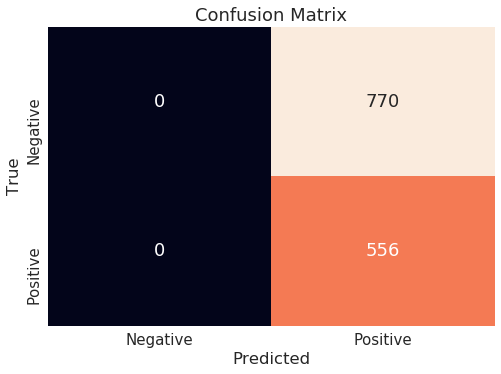

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()